<center>
<img src="https://wpsovet.ru/wp-content/uploads/1/6/4/1642a836ada1355f35ef577d9024a728.jpg" width="700"> 

# Андан на экономе: домашнее задание 2
</center>

**ФИО:** Халифаева Лейла Илхамовна

**id из контеста:** likhalifaeva@edu.hse.ru

**Внимание, конкурс!** 

Напиши свой любимый анекдот. Аcсисты и семенаристы устроют голосование. Лучшая тройка получит по бонусному баллу.

**Место для аника:**

## Общая информация


__Дата выдачи:__ 06.03.2023

__Мягкий дедлайн:__ 23:59MSK 02.04.2022

__Жесткий дедлайн:__ 23:59MSK 09.04.2022

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-NUM-USERNAME.ipynb, где NUM — номер из вашего логина, а USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

Если хотите, можете разбить тетрадку на несколько разных для своего удобства.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="muted")
import matplotlib.gridspec as gridspec

!pip install pandas==1.5.2
!pip install numpy==1.23.5
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

C:\Users\halif\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(pd.__version__)
print(np.__version__)

1.5.2
1.23.5


# Часть 1: рисковая 

В этом задании мы немного поработаем с ценами на акции. За задание можно получить $50$ баллов.

В табличке `prices.tsv` лежат данные о том, как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по ценным бумагам. Подгрузим эти таблицы и посмотрим на них. 

In [3]:
df_prices = pd.read_csv('price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices.head()

(2518, 521)


,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2013-03-05 00:00:00,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
1,2013-03-06 00:00:00,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2,2013-03-07 00:00:00,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
3,2013-03-08 00:00:00,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
4,2013-03-11 00:00:00,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


In [4]:
df_inf = pd.read_csv('information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


## 1.1 Разогреваемся

__а) [0 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [5]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices = df_prices.set_index('Date')
df_prices

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-05,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,63.810726,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
2013-03-06,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,64.217216,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2013-03-07,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,64.349945,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
2013-03-08,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,64.997017,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
2013-03-11,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,64.955536,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,142.179993,15.630000,140.630005,147.919998,154.279999,156.630005,123.529999,99.769997,69.209999,266.250000,...,110.550003,34.549999,102.550003,126.570000,123.300003,296.230011,50.389999,73.720001,131.839996,165.470001
2023-02-28,141.970001,15.980000,144.960007,147.410004,153.899994,155.559998,123.279999,101.720001,70.000000,265.549988,...,109.910004,38.070000,102.650002,127.160004,123.870003,300.250000,50.619999,74.589996,131.149994,167.000000
2023-03-01,137.509995,16.030001,138.820007,145.309998,155.270004,156.509995,120.830002,100.830002,70.970001,263.589996,...,110.889999,37.360001,101.089996,126.199997,122.080002,302.339996,50.439999,69.620003,128.440002,167.570007


__б) [5 баллов]__ В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [6]:
n_1 = len(df_inf[df_inf['NASDAQ'] == True])
print(f"В индекс NASDAQ входят {n_1} ценные бумаги.")

В индекс NASDAQ входят 103 ценные бумаги.


Сколько ценных бумаг входят во все три индекса сразу?

In [7]:
n_2 = len(df_inf[(df_inf['NASDAQ'] == True) & (df_inf['S&P-500'] == True) & (df_inf['DJI'] == True)])
print(f"Во все три индекса сразу входят {n_2} ценных бумаг.")

Во все три индекса сразу входят 5 ценных бумаг.


В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [8]:
n_3 = len(df_inf[(df_inf['S&P-500'] == True) & (df_inf['Founded'] >= 1800) & (df_inf['Founded'] <= 1899)])
print(f"В 19 веке было основано {n_3} компаний из индекса S&P-500.")

В 19 веке было основано 95 компаний из индекса S&P-500.


В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [9]:
n_4 = len(df_inf['GICS Sector'].value_counts())
print(f"Всего представлено {n_4} уникальных секторов.")

Всего представлено 11 уникальных секторов.


Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров? 

In [10]:
n_5 = len(set(df_prices.columns) - set(df_inf['Symbol'].value_counts().index))
print(f"В таблицу с ценами попало {n_5} тикеров, не попавших в таблицу с информацией.")

В таблицу с ценами попало 58 тикеров, не попавших в таблицу с информацией.


__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

In [11]:
big_sect = df_inf['GICS Sector'].value_counts(sort=True).index.tolist()[:3]
n_6 = len(df_inf[(df_inf['S&P-500'] == True) & ((df_inf['GICS Sector'] == big_sect[0]) | (df_inf['GICS Sector'] == big_sect[1]) | (df_inf['GICS Sector'] == big_sect[2]))])
print(f"На 3 самых крупных сектора приходится {n_6} компаний из индекса S&P-500.")

На 3 самых крупных сектора приходится 210 компаний из индекса S&P-500.


__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

__Ответ:__

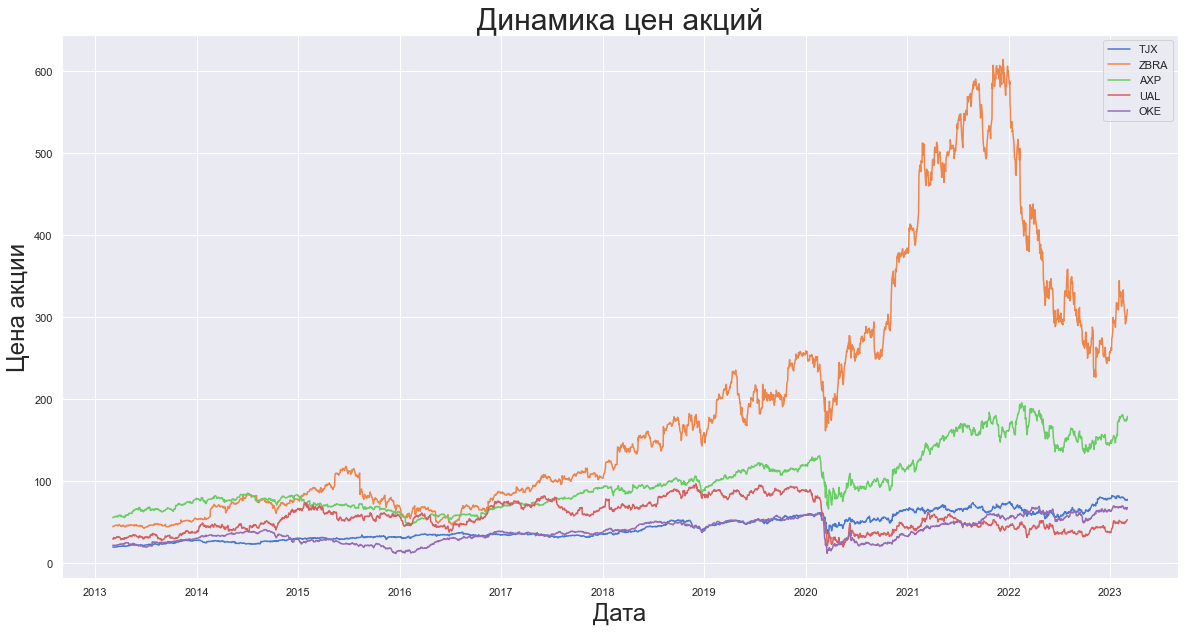

In [12]:
np.random.seed(2023)
tiker = np.random.choice(df_prices.columns, size = 5)

plt.figure(figsize=(20,10))
plt.plot(df_prices[tiker.tolist()])
plt.xlabel('Дата',fontsize=24)
plt.ylabel('Цена акции',fontsize=24)
plt.title('Динамика цен акций',fontsize=30)
plt.legend(tiker.tolist())

Text(0.5, 1.0, 'Распределение стоимости акций TJX')

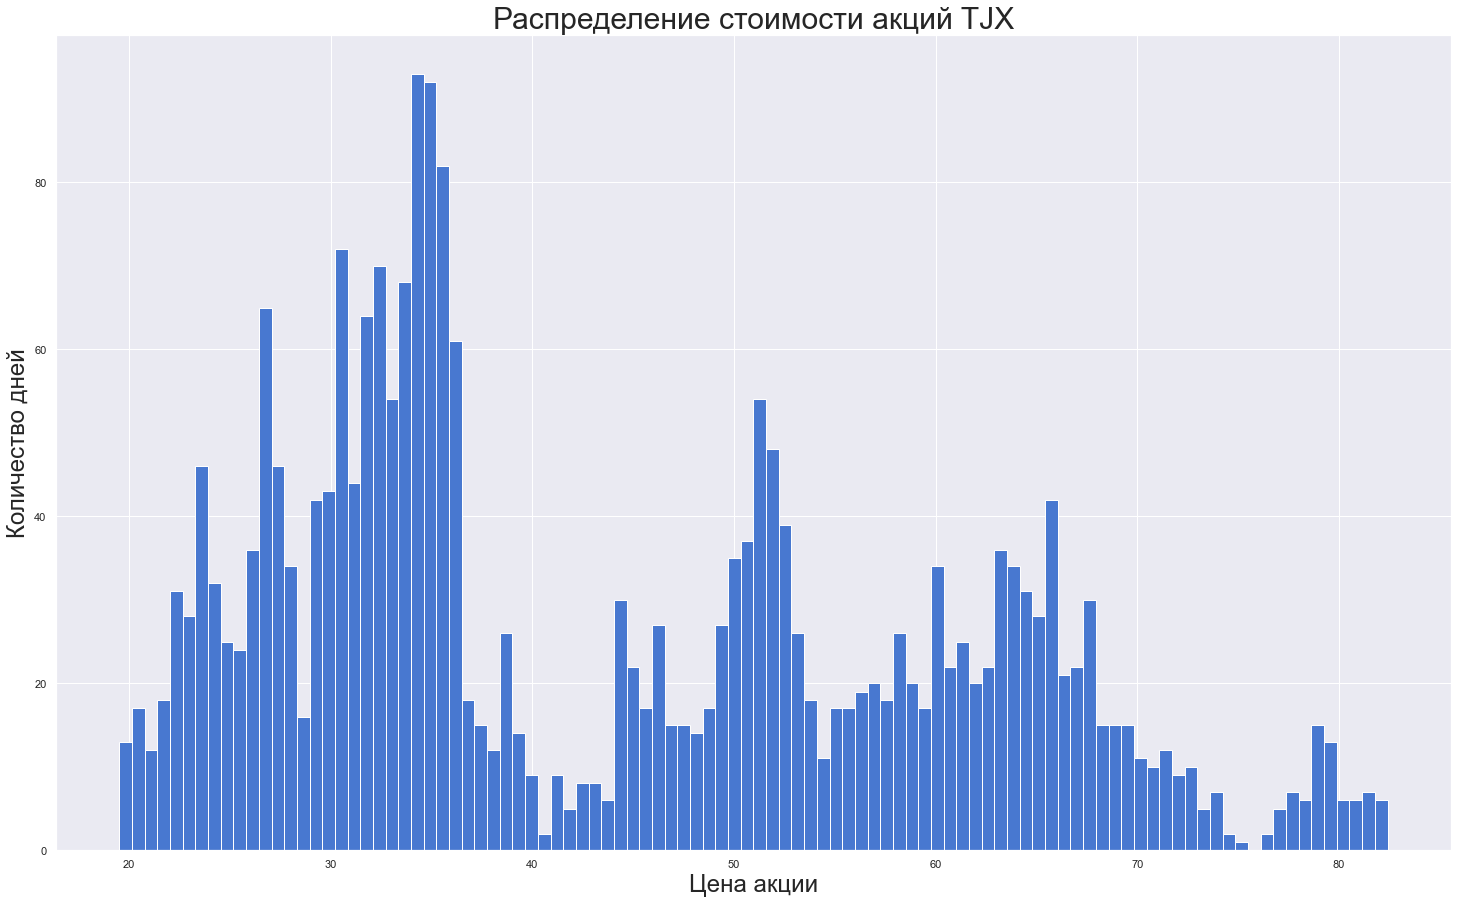

In [13]:
plt.figure(figsize=(25,15))
plt.hist(df_prices['TJX'], bins=100)
plt.xlabel('Цена акции',fontsize=24)
plt.ylabel('Количество дней',fontsize=24)
plt.title('Распределение стоимости акций TJX',fontsize=30)

Text(0.5, 1.0, 'Распределение стоимости акций ZBRA')

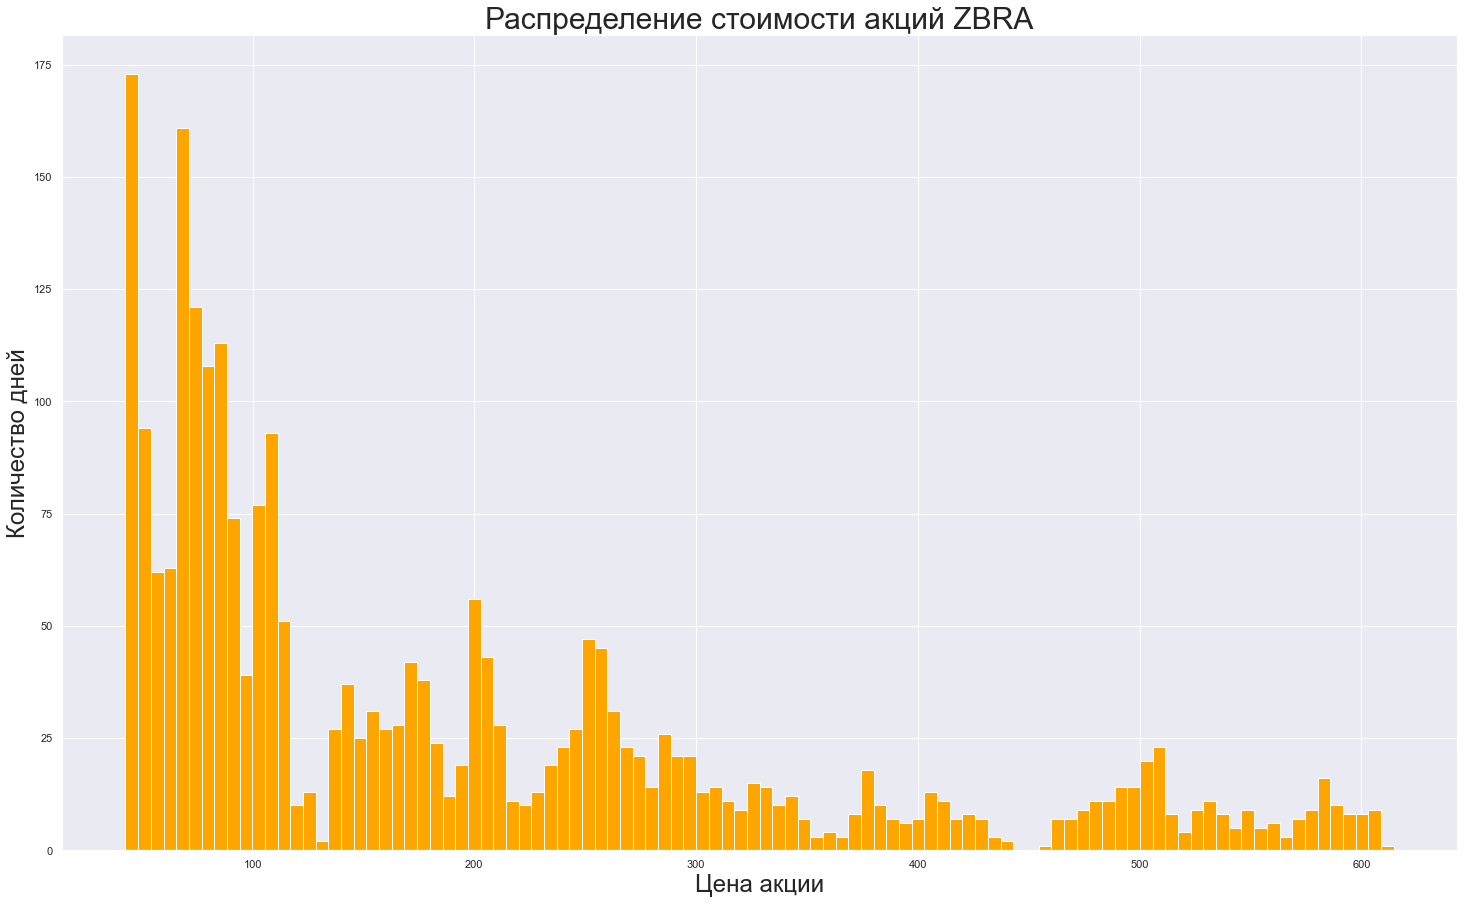

In [14]:
plt.figure(figsize=(25,15))
plt.hist(df_prices['ZBRA'], bins=100, color='orange')
plt.xlabel('Цена акции',fontsize=24)
plt.ylabel('Количество дней',fontsize=24)
plt.title('Распределение стоимости акций ZBRA',fontsize=30)

Text(0.5, 1.0, 'Распределение стоимости акций AXP')

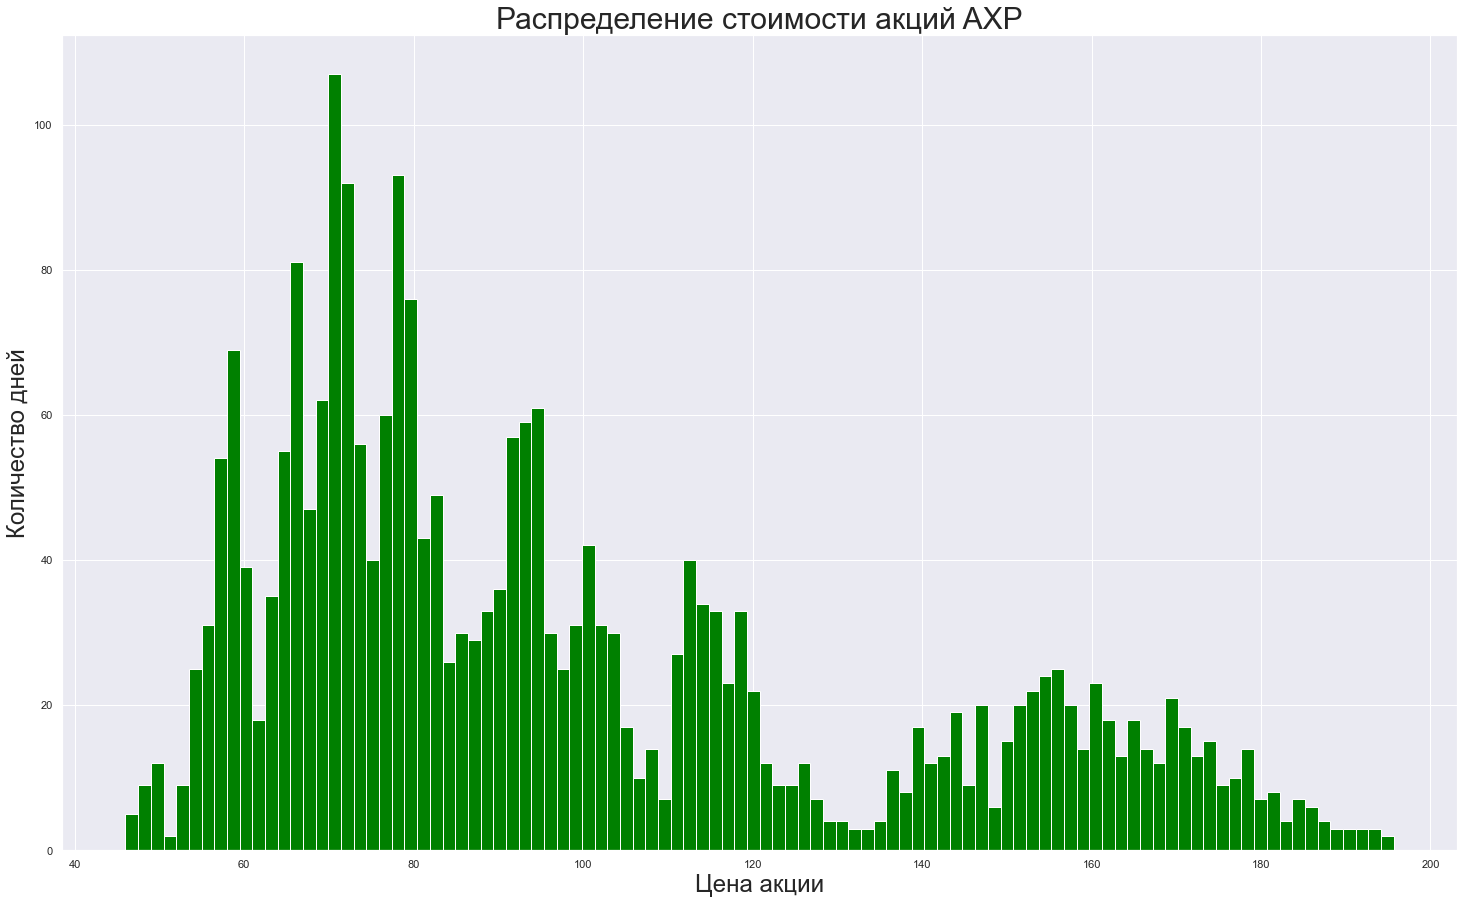

In [15]:
plt.figure(figsize=(25,15))
plt.hist(df_prices['AXP'], bins=100, color='green')
plt.xlabel('Цена акции',fontsize=24)
plt.ylabel('Количество дней',fontsize=24)
plt.title('Распределение стоимости акций AXP',fontsize=30)

Text(0.5, 1.0, 'Распределение стоимости акций UAL')

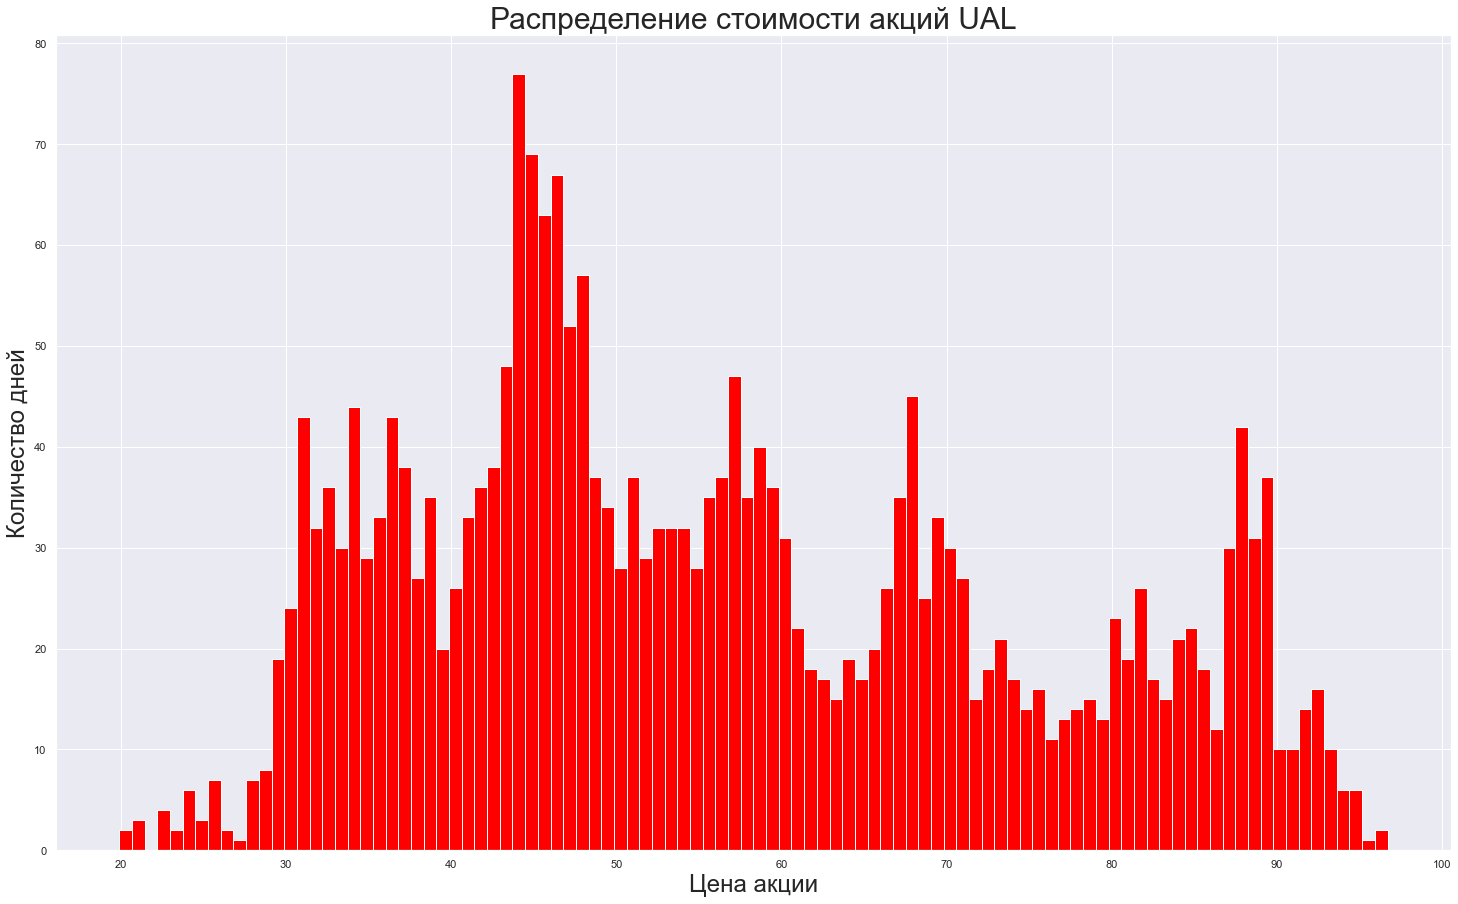

In [16]:
plt.figure(figsize=(25,15))
plt.hist(df_prices['UAL'], bins=100, color='red')
plt.xlabel('Цена акции',fontsize=24)
plt.ylabel('Количество дней',fontsize=24)
plt.title('Распределение стоимости акций UAL',fontsize=30)

Text(0.5, 1.0, 'Распределение стоимости акций OKE')

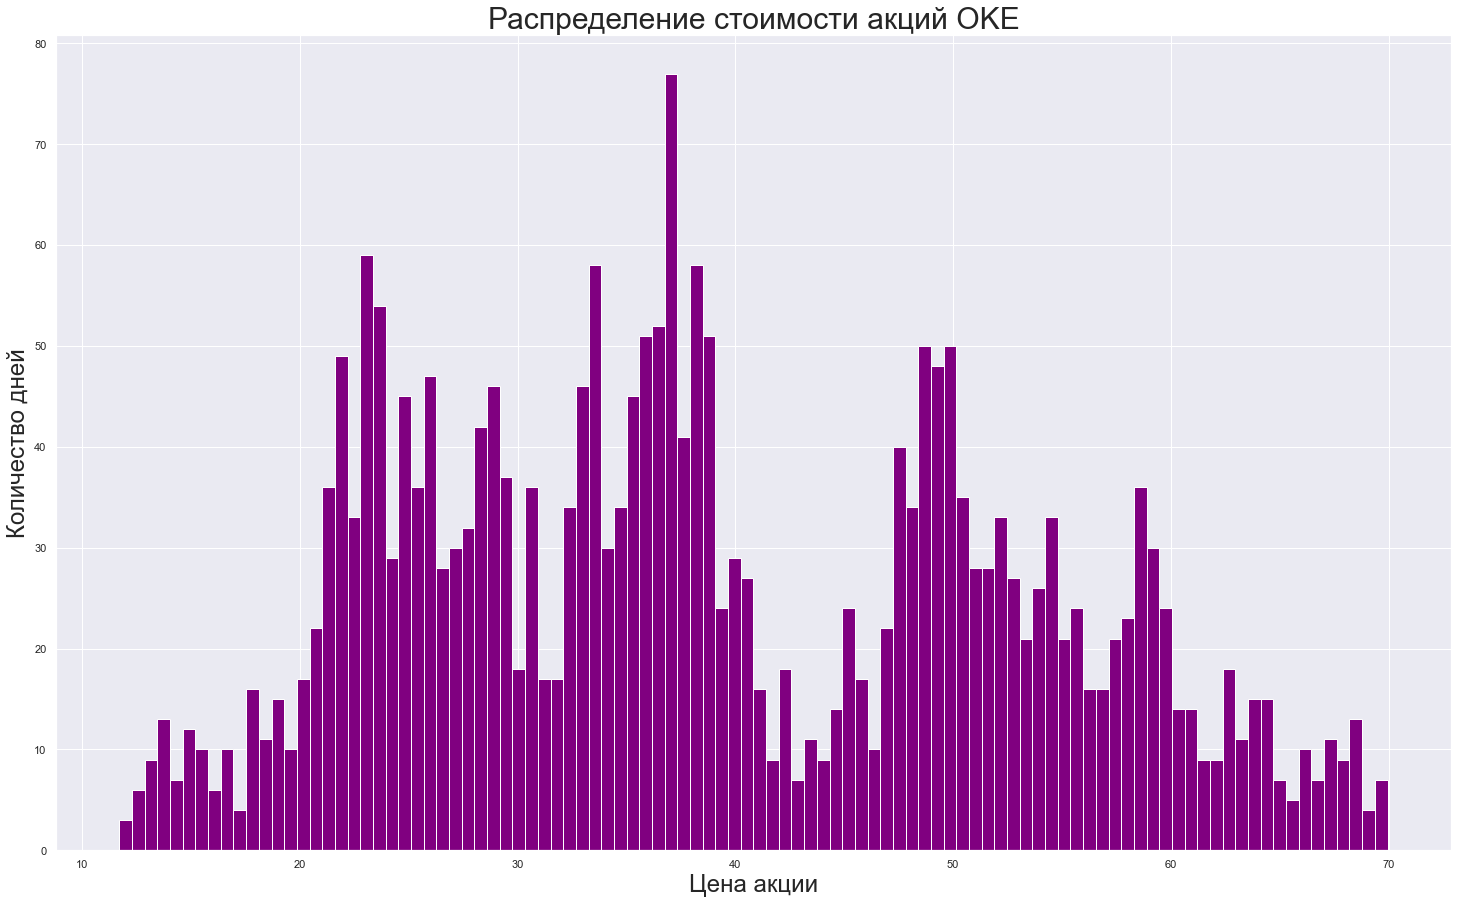

In [17]:
plt.figure(figsize=(25,15))
plt.hist(df_prices['OKE'], bins=100, color='purple')
plt.xlabel('Цена акции',fontsize=24)
plt.ylabel('Количество дней',fontsize=24)
plt.title('Распределение стоимости акций OKE',fontsize=30)

__Выводы:__ 
1) Распределения стоимостей акций, похожи на нормальное или близки к нему. Особенно это хорошо видно на примере акций AXP и OKE. 

2) В течение последних 10 лет наблюдается рост финансовых рынков. При этом, в начале-середине 2020 и 2022 года заметно падение стоимости акций, что свидетельствуент о кризисах.

 __д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

In [18]:
df_new1 = pd.DataFrame(df_prices.columns)
df_new1.columns = ['Symbol']
df_new1['Median_price'] = list(df_prices.loc['20220330':].median(axis=0)) #взяла прошедший до текущего момента год(30.03.2023) 

df_new2 = pd.DataFrame(df_inf['Symbol'])
df_new2['Sector'] = df_inf['GICS Sector']

df_new = df_new1.join(df_new2.set_index('Symbol'), on='Symbol', how='left')
df_new

,Symbol,Median_price,Sector
0,A,132.213654,Health Care
1,AAL,14.320000,Industrials
2,AAP,171.309143,Consumer Discretionary
3,AAPL,148.031769,Information Technology
4,ABBV,147.670731,Health Care
...,...,...,...
515,ZBRA,301.640015,Information Technology
516,ZION,51.843731,Financials
517,ZM,82.589996,NaN
518,ZS,149.320007,NaN


In [19]:
df = df_new.groupby(by='Sector')
df.quantile(0.95)

C:\Users\halif\AppData\Local\Temp/ipykernel_14540/2464551016.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.quantile(0.95)


,Median_price
Sector,
Communication Services,250.745496
Consumer Discretionary,1758.400024
Consumer Staples,243.883125
Energy,165.633922
Financials,348.130005
Health Care,524.909534
Industrials,431.874100
Information Technology,403.440121
Materials,292.154585


## 1.2 Риск и доходность

__е) [5 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [20]:
df_r = df_prices.diff() / df_prices.shift(1)
df_r = df_r.drop(index=['20130305'])
df_r

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,0.006940,0.004499,0.012820,0.008248,0.010281,-0.012234,0.006108,-0.006868,0.000578,-0.001051,...,-0.001806,0.006408,0.001465,-0.002050,0.004890,0.014764,0.002387,-0.002841,0.007335,-0.005170
2023-02-28,-0.001477,0.022393,0.030790,-0.003448,-0.002463,-0.006831,-0.002024,0.019545,0.011415,-0.002629,...,-0.005789,0.101881,0.000975,0.004661,0.004623,0.013570,0.004564,0.011801,-0.005234,0.009246
2023-03-01,-0.031415,0.003129,-0.042357,-0.014246,0.008902,0.006107,-0.019873,-0.008750,0.013857,-0.007381,...,0.008916,-0.018650,-0.015197,-0.007550,-0.014451,0.006961,-0.003556,-0.066631,-0.020663,0.003413


Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 

__Ответ:__ 
1) Доходности по акциям имеют нормальное распределение

2) По ящикам с усами видно, что есть выбросы и их достаточно много

In [21]:
np.random.seed(2023)
tiker_2 = np.random.choice(df_r.columns, size = 5)
tiker_2

array(['TJX', 'ZBRA', 'AXP', 'UAL', 'OKE'], dtype=object)

Text(0.5, 1.0, 'Ящик с усами')

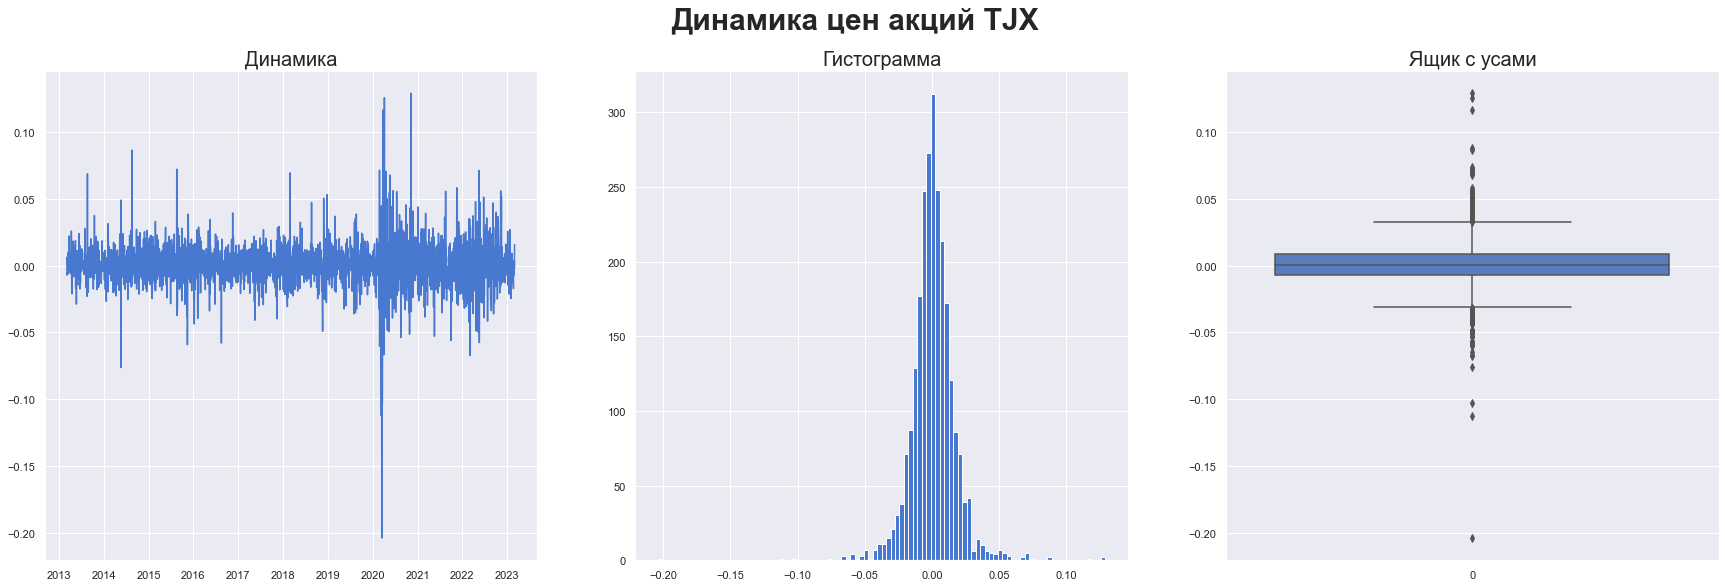

In [22]:
plt.figure(figsize=[30, 9])
plt.suptitle('Динамика цен акций TJX', fontsize=30, fontweight='bold')

plt.subplot(1, 3, 1)
plt.plot(df_r['TJX'])
plt.title('Динамика', fontsize=20)

plt.subplot(1, 3, 2)
plt.hist(df_r['TJX'], bins=100)
plt.title('Гистограмма', fontsize=20)

plt.subplot(1, 3, 3)
sns.boxplot(data=df_r['TJX'])
plt.title('Ящик с усами', fontsize=20)

Text(0.5, 1.0, 'Ящик с усами')

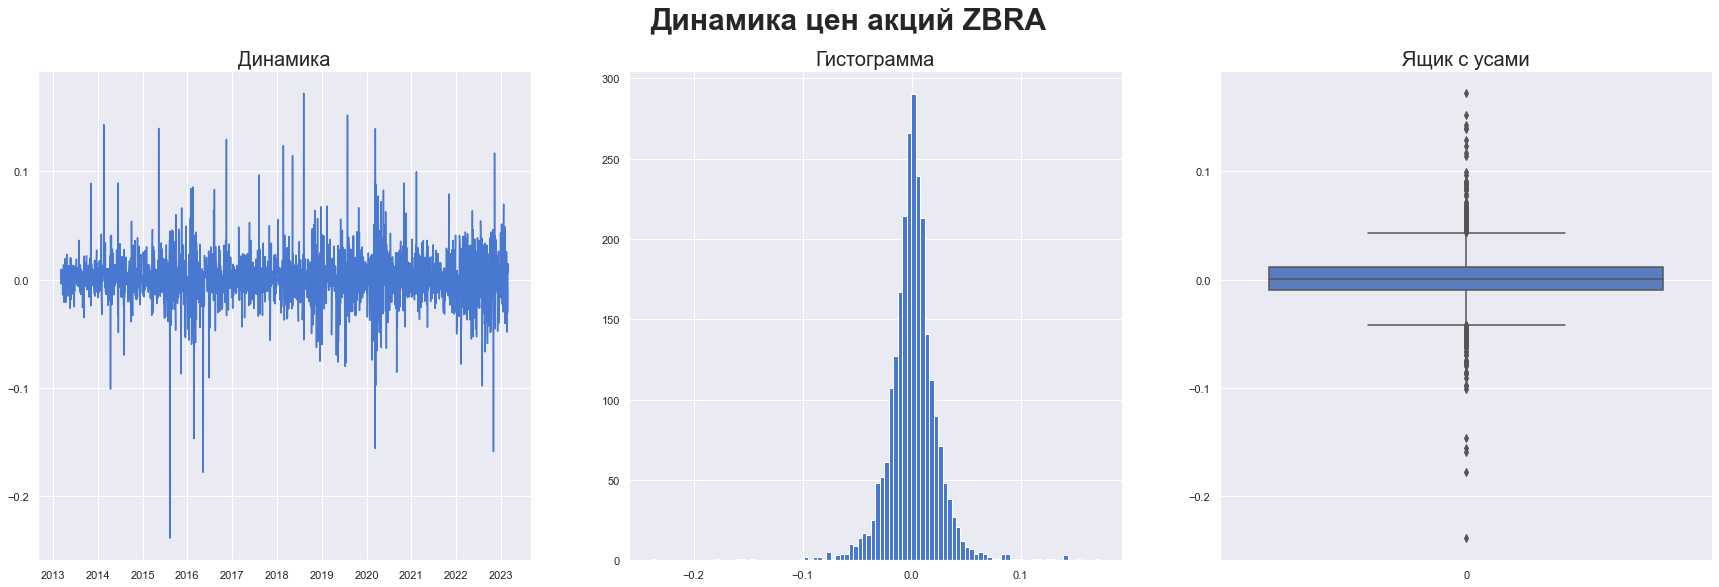

In [23]:
plt.figure(figsize=[30, 9])
plt.suptitle('Динамика цен акций ZBRA', fontsize=30, fontweight='bold')

plt.subplot(1, 3, 1)
plt.plot(df_r['ZBRA'])
plt.title('Динамика', fontsize=20)

plt.subplot(1, 3, 2)
plt.hist(df_r['ZBRA'], bins=100)
plt.title('Гистограмма', fontsize=20)

plt.subplot(1, 3, 3)
sns.boxplot(data=df_r['ZBRA'])
plt.title('Ящик с усами', fontsize=20)

Text(0.5, 1.0, 'Ящик с усами')

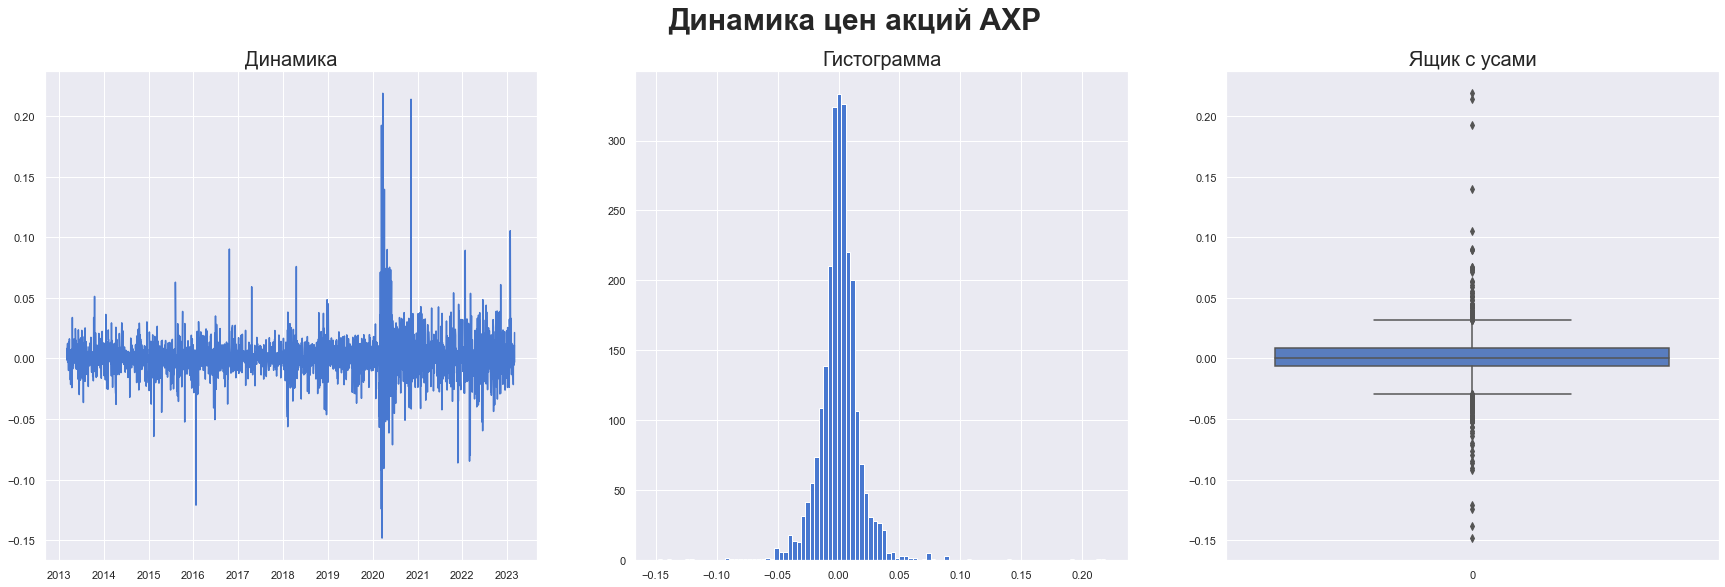

In [24]:
plt.figure(figsize=[30, 9])
plt.suptitle('Динамика цен акций AXP', fontsize=30, fontweight='bold')

plt.subplot(1, 3, 1)
plt.plot(df_r['AXP'])
plt.title('Динамика', fontsize=20)

plt.subplot(1, 3, 2)
plt.hist(df_r['AXP'], bins=100)
plt.title('Гистограмма', fontsize=20)

plt.subplot(1, 3, 3)
sns.boxplot(data=df_r['AXP'])
plt.title('Ящик с усами', fontsize=20)

Text(0.5, 1.0, 'Ящик с усами')

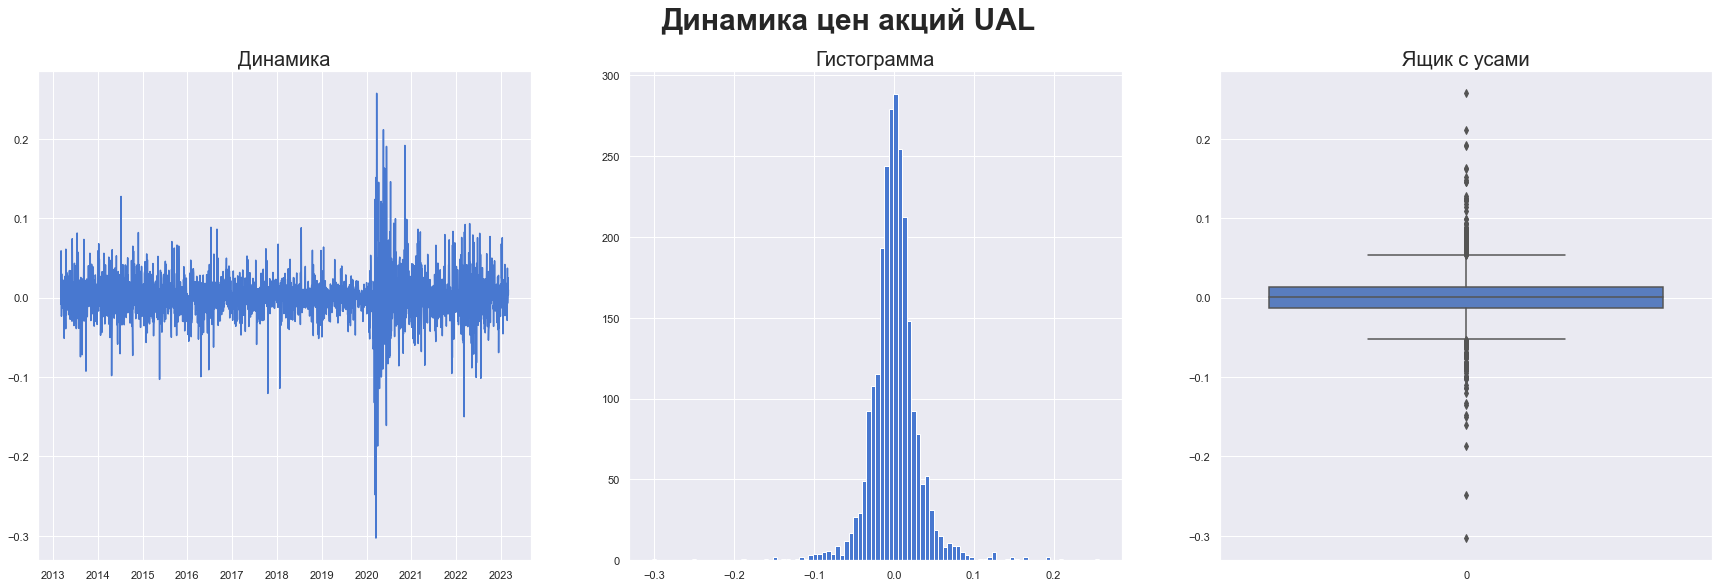

In [25]:
plt.figure(figsize=[30, 9])
plt.suptitle('Динамика цен акций UAL', fontsize=30, fontweight='bold')

plt.subplot(1, 3, 1)
plt.plot(df_r['UAL'])
plt.title('Динамика', fontsize=20)

plt.subplot(1, 3, 2)
plt.hist(df_r['UAL'], bins=100)
plt.title('Гистограмма', fontsize=20)

plt.subplot(1, 3, 3)
sns.boxplot(data=df_r['UAL'])
plt.title('Ящик с усами', fontsize=20)

Text(0.5, 1.0, 'Ящик с усами')

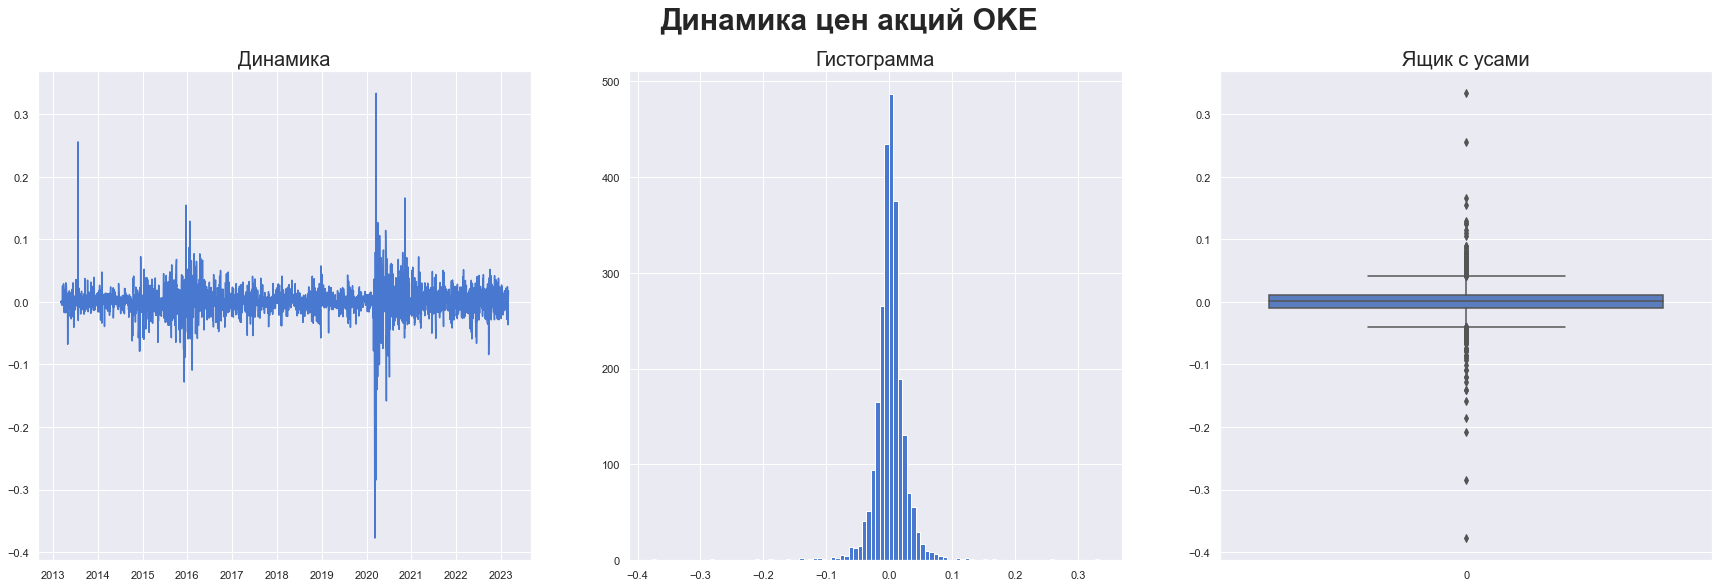

In [26]:
plt.figure(figsize=[30, 9])
plt.suptitle('Динамика цен акций OKE', fontsize=30, fontweight='bold')

plt.subplot(1, 3, 1)
plt.plot(df_r['OKE'])
plt.title('Динамика', fontsize=20)

plt.subplot(1, 3, 2)
plt.hist(df_r['OKE'], bins=100)
plt.title('Гистограмма', fontsize=20)

plt.subplot(1, 3, 3)
sns.boxplot(data=df_r['OKE'])
plt.title('Ящик с усами', fontsize=20)

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону. 

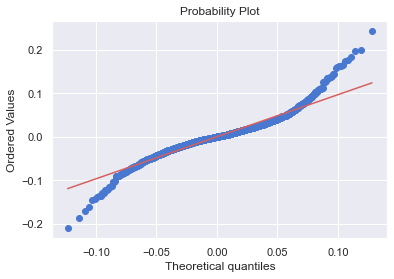

In [27]:
ax = plt.subplot(111)
x = df_r['TSLA'].values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [28]:
df_train = df_r[df_r.index  < '2022-03-03']
df_test = df_r[df_r.index  >= '2022-03-03']

__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [29]:
R = df_train.mean()
print(f'10 самых доходных компаний: {list(R.nlargest(10).index)}')
print(f'10 самых убыточных компаний: {list(R.nsmallest(10).index)}')

10 самых доходных компаний: ['CEG', 'LCID', 'MRNA', 'GFS', 'DDOG', 'CARR', 'ENPH', 'ZS', 'TSLA', 'CRWD']
10 самых убыточных компаний: ['RIVN', 'VTRS', 'KHC', 'GE', 'IBM', 'LUMN', 'KMI', 'SLB', 'BEN', 'WBD']


Среди самых доходных компаний есть Тесла.

Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых.  Есть ли среди самых рискованных компаний Тесла? :) 

In [30]:
STD = df_train.std()
print(f'10 самых рискованных компаний: {list(STD.nlargest(10).index)}')
print(f'10 самых безрисковых компаний: {list(STD.nsmallest(10).index)}')

10 самых рискованных компаний: ['RIVN', 'LCID', 'ENPH', 'MRNA', 'PDD', 'ZM', 'GFS', 'SEDG', 'CRWD', 'DDOG']
10 самых безрисковых компаний: ['VZ', 'JNJ', 'KO', 'PG', 'RSG', 'WM', 'PEP', 'CL', 'MMC', 'COST']


Среди самых рискованных компаний нет Теслы.

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [31]:
df_result = pd.DataFrame()
df_result['std'] = STD
df_result['r'] = R
df_result.head()

,std,r
A,0.015556,0.000808
AAL,0.031476,0.000579
AAP,0.020050,0.000659
AAPL,0.017579,0.001268
ABBV,0.017331,0.000925


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

__Ответ:__ Да, можно. На графике видно несколько точек левее Теслы, то есть эти бумаги менее рискованы, и при этом, у них доходность чуть меньше или выше.

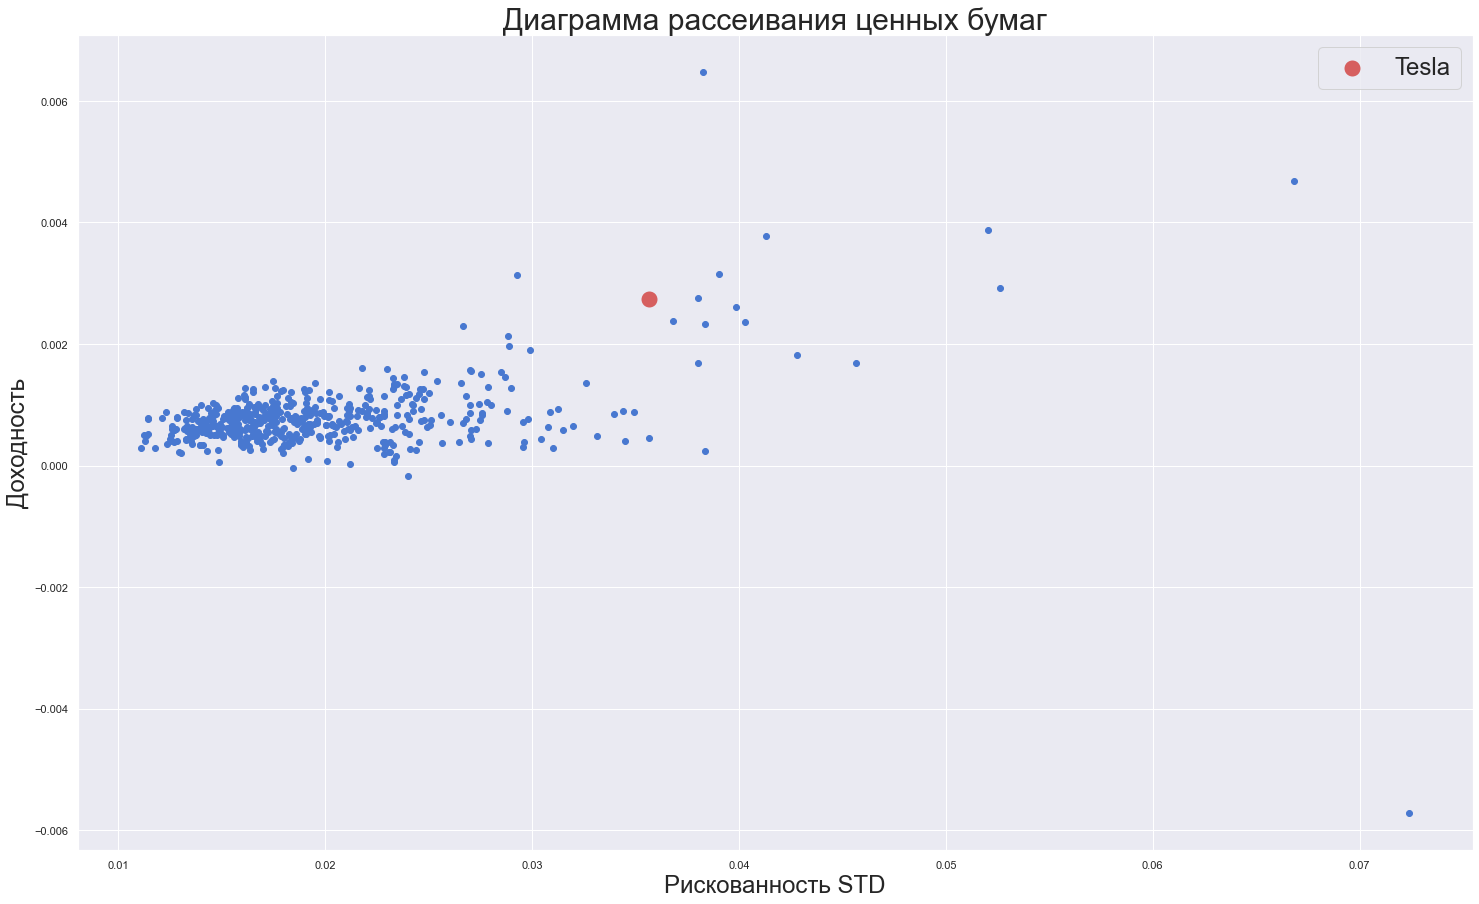

In [32]:
plt.figure(figsize=(25,15))

plt.scatter(x=df_result['std'], y=df_result['r'])
plt.scatter(x=df_result.loc['TSLA'][0], y=df_result.loc['TSLA'][1], color='r', linewidth=10, label='Tesla')

plt.xlabel('Рискованность STD',fontsize=24)
plt.ylabel('Доходность',fontsize=24)
plt.title('Диаграмма рассеивания ценных бумаг',fontsize=30)
plt.legend(fontsize=24)

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ 

__ж) [5 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [33]:
VaR = df_train.quantile(0.05)
print(f'10 самых рискованных компаний: {list(VaR.nlargest(10).index)}')
print(f'10 самых безрисковых компаний: {list(VaR.nsmallest(10).index)}')

10 самых рискованных компаний: ['WM', 'PG', 'KO', 'RSG', 'MCD', 'PEP', 'JNJ', 'SO', 'VZ', 'CL']
10 самых безрисковых компаний: ['RIVN', 'LCID', 'ENPH', 'MRNA', 'PDD', 'ZM', 'GFS', 'CEG', 'DDOG', 'SEDG']


In [34]:
# добавим получившиеся значения в нашу таблицу
VaR.name = 'VaR'
df_result = df_result.join(VaR)
df_result['VaR'] = df_result['VaR'] * (-1)
df_result.head()

,std,r,VaR
A,0.015556,0.000808,0.025164
AAL,0.031476,0.000579,0.044087
AAP,0.020050,0.000659,0.026499
AAPL,0.017579,0.001268,0.025629
ABBV,0.017331,0.000925,0.024926


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте $\text{VaR}.$

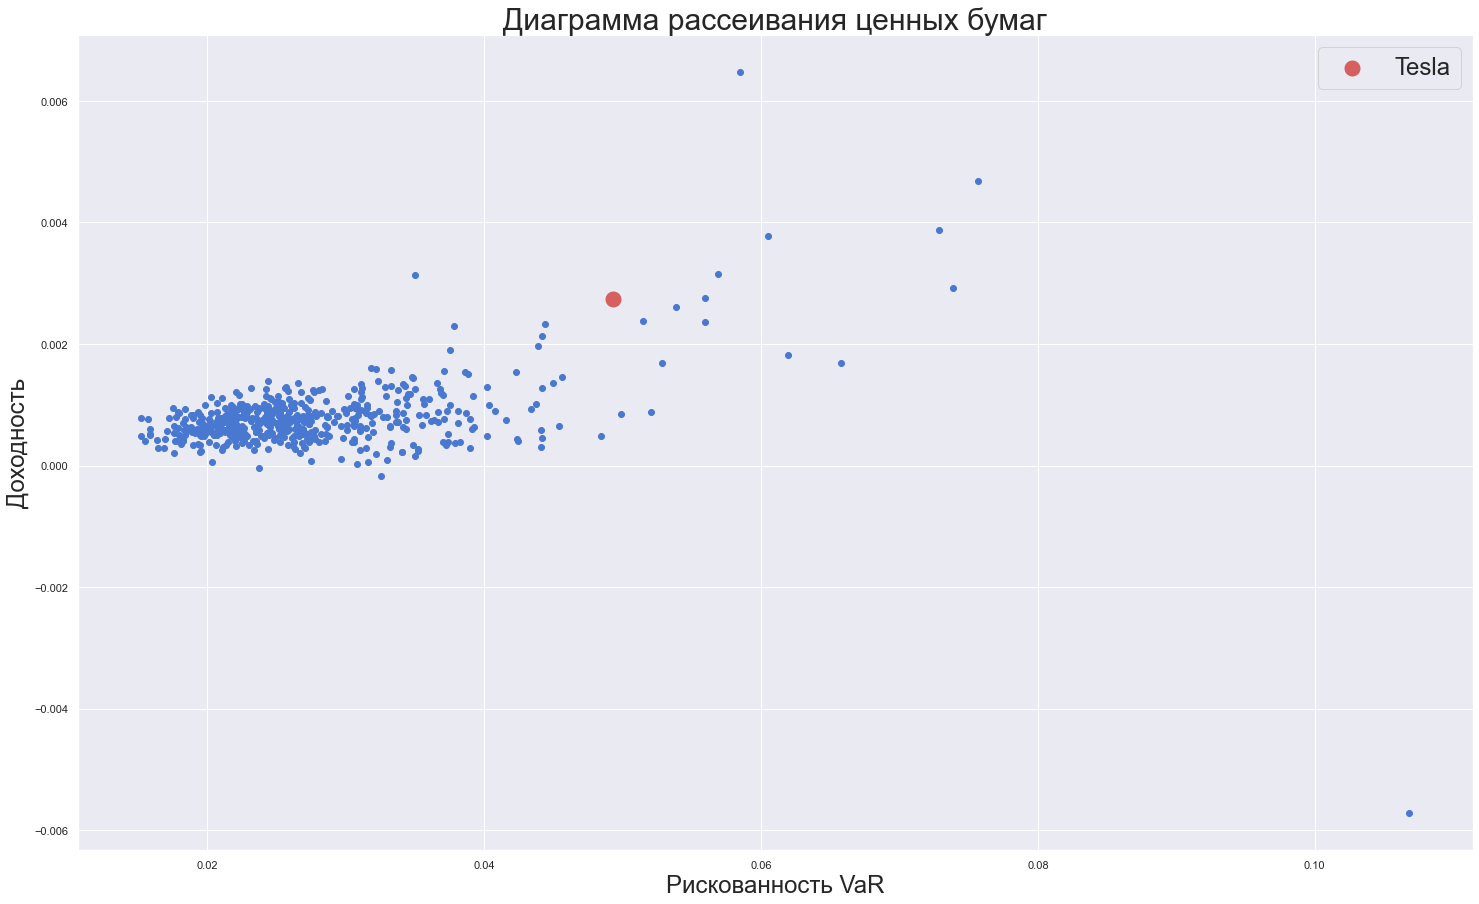

In [35]:
plt.figure(figsize=(25,15))

plt.scatter(x=df_result['VaR'], y=df_result['r'])
plt.scatter(x=df_result.loc['TSLA'][2], y=df_result.loc['TSLA'][1], color='r', linewidth=10, label='Tesla')

plt.xlabel('Рискованность VaR',fontsize=24)
plt.ylabel('Доходность',fontsize=24)
plt.title('Диаграмма рассеивания ценных бумаг',fontsize=30)
plt.legend(fontsize=24)

$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

In [36]:
ES_TSLA_worst = df_train['TSLA'][df_train['TSLA'] < VaR['TSLA']].mean()
print(f"ES для Теслы: {ES_TSLA_worst}")

ES для Теслы: -0.07554044469806385


In [37]:
print(f"В среднем при вложении 1000 долларов в Теслу в один из самых неудачных дней мы потеряем: {abs(ES_TSLA_worst*1000).round(2)} долларов")

В среднем при вложении 1000 долларов в Теслу в один из самых неудачных дней мы потеряем: 75.54 долларов


In [38]:
ES_TSLA_best = df_train['TSLA'][df_train['TSLA'] < df_train['TSLA'].quantile(0.95)].mean()
print(f"В среднем при вложении 1000 долларов в Теслу в один из самых удачных дней мы заработаем: {(ES_TSLA_best*1000).round(2)} долларов")


В среднем при вложении 1000 долларов в Теслу в один из самых удачных дней мы заработаем: -2.09 долларов


Посчитайте $\text{ES}$ по всем ценным бумагам. Домножьте получившееся значение на (-1). Запишите его отдельным столбцом в `df_result` (нужно сделать `join`)

In [39]:
ES = df_train[df_train < VaR].mean()
ES.name = 'ES'
df_result = df_result.join(ES)
df_result['ES'] = df_result['ES'] * (-1)
df_result.head()

,std,r,VaR,ES
A,0.015556,0.000808,0.025164,0.036676
AAL,0.031476,0.000579,0.044087,0.067565
AAP,0.020050,0.000659,0.026499,0.043459
AAPL,0.017579,0.001268,0.025629,0.039872
ABBV,0.017331,0.000925,0.024926,0.040371


In [40]:
df_result = df_result.sort_values(by='ES', ascending=False)
df_result = df_result.round(3)
df_result.reset_index(inplace=True)

In [41]:
df_result = df_result.rename(columns={'index': 'Ticker'})

In [42]:
df_result.to_csv('submission.csv', index = False)

1. Округлите данные до 3-х знаков после запятой `df_result.round(3)`
2. Отсортируйте таблицу `df_result` по колонке `ES` по убыванию
3. Запишите получившиеся результаты в таблицу с колонками `'Ticker', 'std', 'r', 'VaR', 'ES'` в файл `var_result` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми. Порядок колонок должен быть именно таким.
4. Отправьте свой файл `var_result.csv` в контест (https://contest.yandex.ru/contest/47242/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

__likhalifaeva@edu.hse.ru
Посылка: 85109325__

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__Какая метрика лучше?__

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона ["Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок."](https://disk.yandex.ru/i/ryFfPZ8_1uTO6g) Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.

## 1.3 VaR-кривая 

__з) [10 баллов]__ Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.

In [43]:
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285

На тестовой выборке мы пробили для Теслы VaR в 14% случаев вместо 5%. Это очень плохой результат. Наша оценка риска оказалась провальной. Можно с помощью теста Купика проверить значимость этих отличий, но мы пока что не будем это делать. Отложим эту историю до домашки про гипотезы.

Нарисуем VaR-кривую.

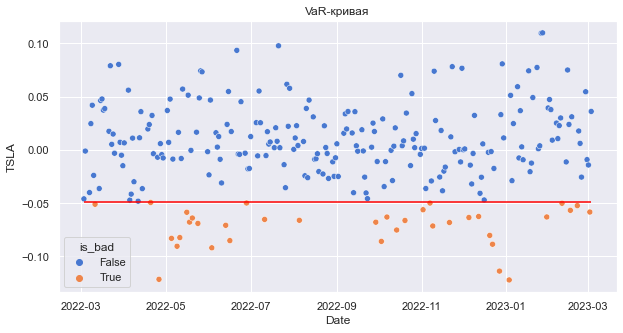

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('VaR-кривая');

А почему все это плохо? А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $\text{VaR}$ и так с ним и сидим. Давайте сделаем по-другому.

- Выделите $N$ точек (первые 4 года), найдите по ним $\text{VaR}$ для $N+1$ дня. Потом сдвинем $N$ точек вправо и найдём $\text{VaR}$ по ним для точки $N + 2$. И так далее. Тогда $\text{VaR}$ будет в каждой точке разный. 
- Нарисуйте получившуюся для Теслы кривую на картинке.
- Посчитайте как часто мы пробивали $\text{VaR}$ на практике, улучшилась ли цифра?

In [45]:
n = len(df_train['TSLA'])
VaR_tsla = []

for i in range(n+1, len(df_r['TSLA'])+1):
    VaR_n_plus_1 = df_r['TSLA'].iloc[i-n-1:i].quantile(0.05)
    VaR_tsla.append(VaR_n_plus_1)  

In [46]:
df_tsla = df_test['TSLA'].reset_index()
df_tsla['VaR'] = VaR_tsla
df_tsla['is_bad'] = (df_test['TSLA'].values < VaR_tsla)
df_tsla['is_bad'].mean()

0.1349206349206349

Text(0.5, 1.0, 'VaR-кривая')

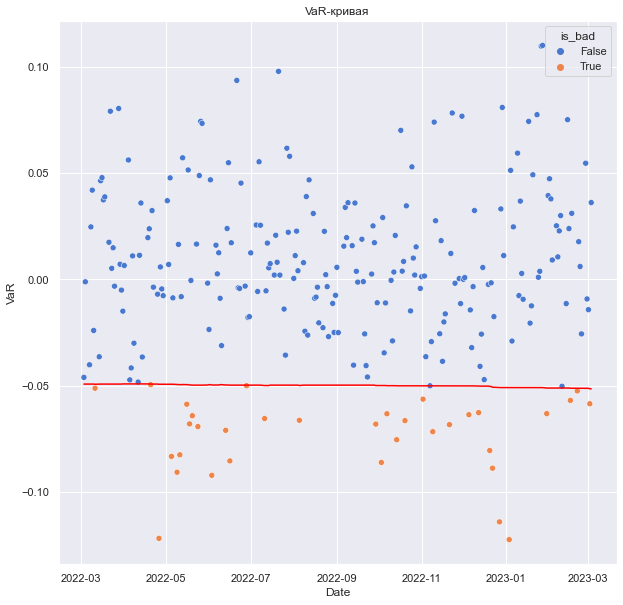

In [47]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df_tsla, x='Date',y='VaR', color='red')
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')

plt.title('VaR-кривая')

__Вывод:__ цифра улучшилась, но незначительно.

Способ оценки $\text{VaR},$ который мы использовали, называется **историческим.** Кроме него есть довольно много других способов. Например:

- можно попробовать подогнать какое-то распределение под данные и взять его квантиль
- можно попробовать обучить модель машинного обучения предсказывать соотвествующий квантиль
- можно обучить какую-нибудь модель на временном ряде
- можно попробовать отдельно моделировать хвосты распределения

Часть способов более подробно можно [посмотреть в лекциях Ильи Езепова.](https://rpubs.com/iezepov) Они немного староваты, но хороши. 

__и) [бонусные 5 баллов]__

Разберитесь как работает какой-нибудь ещё метод оценки $\text{VaR}$ и реализуйте его. Сравните его работу с историческим методом на нескольких ценных бумагах из наших данных. Например, вы можете разобраться с [ОГРом](https://rpubs.com/iezepov/e502lec2) или [моделированием хвостов.](https://rpubs.com/iezepov/e502lec6) Весь код должен быть написан на питоне. Часть бонуса -- попытаться найти библиотеки для этого.

In [48]:
# your code here
# [✖‿✖]

  ---------

# Часть 2: чековая

За задание можно получить $50$ баллов. Мы будем работать с покупками и чеками. Смотреть за корреляциями в покупках довольно полезно.

> В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». 

>К сожалению, такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

Для работы будем использовать датасет о продуктовых корзинах: https://www.kaggle.com/heeraldedhia/groceries-dataset

- `id` - номер покупки (чека)
- `fielddate` - дата покупки
- `product` - что было куплено

In [49]:
df = pd.read_csv('groceries.csv', sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df.head()

(38765, 3)


,id,fielddate,product
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## 2.1 Разогреваемся

__а) [10 баллов]__ Сколько всего уникальных заказов было сделано?

In [50]:
num_1 = len(df.groupby(by=['id', 'fielddate'])['product'].unique())
print(f'Всего уникальных заказов было сделано {num_1}')

Всего уникальных заказов было сделано 14963


__Замечание:__ один чек может относиться к разным датам, поэтому посчитала число чеков по датам.

Какие товары покупались чаще всего? Найдите топ-10 самых популярных товаров и изобразите частоту их покупок на столбиковой диаграмме. 

In [51]:
most_popular = df['product'].value_counts(sort=True)
print(f'Чаще всего покупалист следующие товары: {list(most_popular.index[:10])}')

Чаще всего покупалист следующие товары: ['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'root vegetables', 'tropical fruit', 'bottled water', 'sausage', 'citrus fruit']


Text(0.5, 1.0, 'Частота приобретения топ-10 самых популярных товаров')

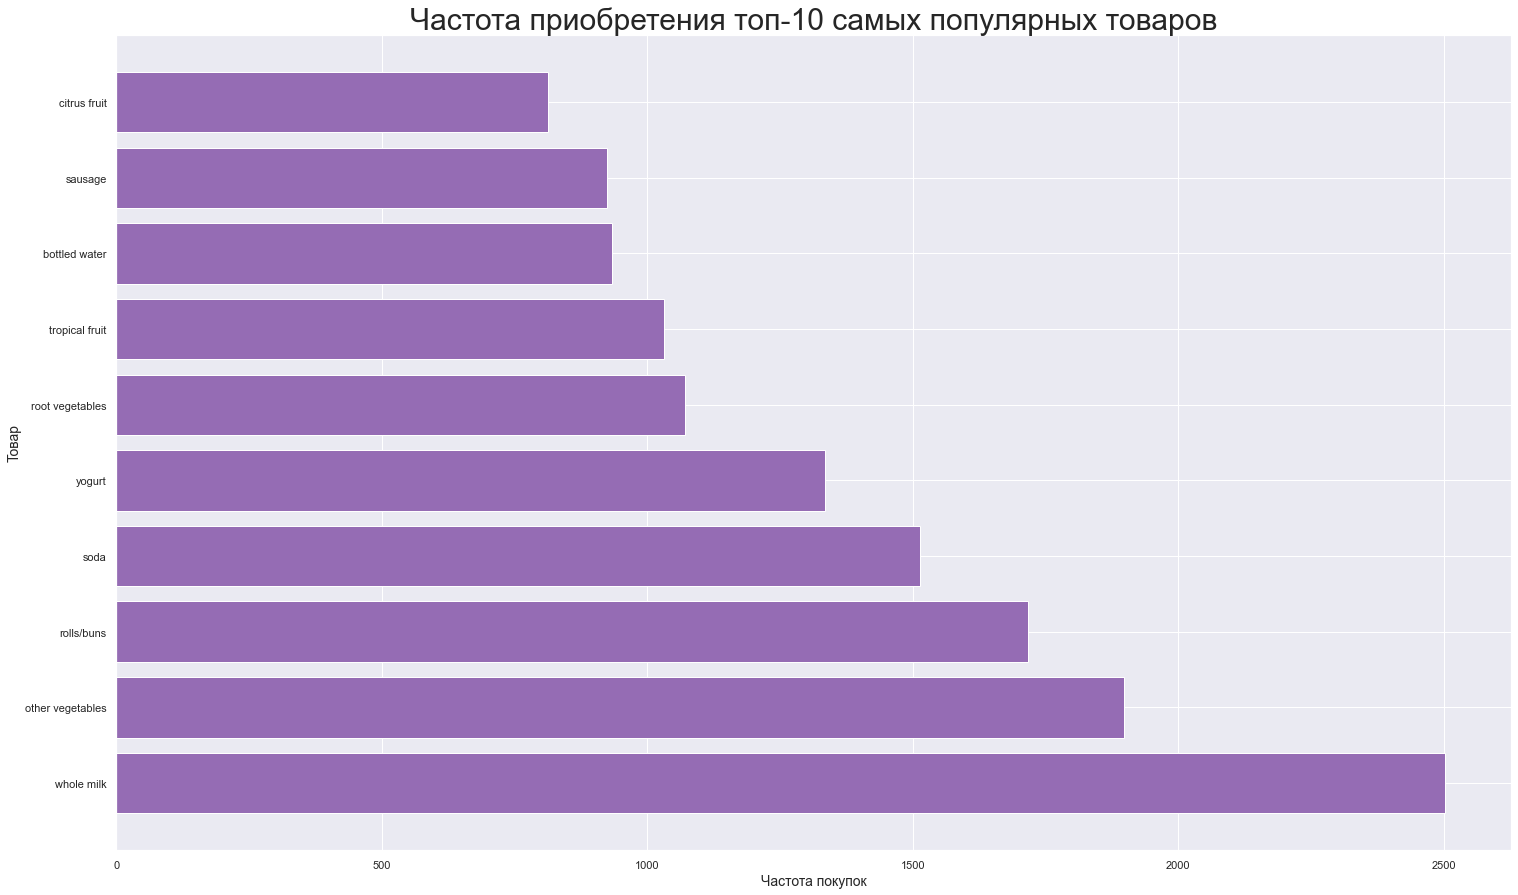

In [52]:
plt.figure(figsize=(25,15))

plt.barh(y=np.array(most_popular.index[:10]), width=np.array(most_popular[:10]), color='m')

plt.xlabel('Частота покупок',fontsize=14)
plt.ylabel('Товар',fontsize=14)
plt.title('Частота приобретения топ-10 самых популярных товаров',fontsize=30)

In [53]:
text = ", ".join(df['product'])

Визуализируйте как часто покупались товары с помощью [облака слов.](https://www.python-graph-gallery.com/wordcloud/) Для графика используйте все товары из датасета. 

In [54]:
from wordcloud import WordCloud

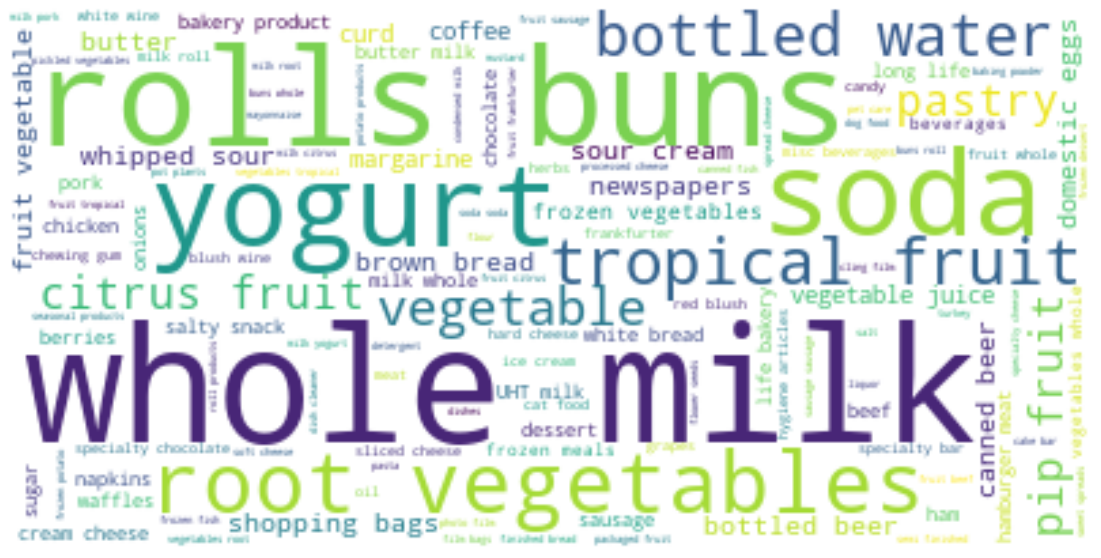

In [55]:
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(25,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

__б) [10 баллов]__ Начнём анализировать совместные покупки товаров.

В таблице выше в каждой строке записана информация о покупке конкретного товара. Давайте сделаем табличку размера "число товаров" на "число покупок", чтобы понимать какие товары покупались вместе, а какие нет. 

По строкам отложите номера чеков. По столбцам отложите название продуктов. На пересечении должно стоять число товаров, купленное в этом чеке. Используйте для этого команду `pivot_table`.

In [56]:
dop_tab = df[['id', 'product']].value_counts().to_frame('counts').rename_axis(['id','product'])
dop_tab = dop_tab.sort_values(by='id')
dop_tab

counts
id   product                    
1000 hygiene articles          1
     misc. beverages           1
     pastry                    1
     pickled vegetables        1
     salty snack               1
...                          ...
5000 onions                    1
     other vegetables          1
     root vegetables           1
     semi-finished bread       1
     soda                      1

[34766 rows x 1 columns]

In [57]:
joint_prod = pd.pivot_table(dop_tab, index=['id'], columns=['product'], values=['counts'], fill_value=0)
joint_prod.head()

counts                                             \
product Instant food products UHT-milk abrasive cleaner artif. sweetener   
id                                                                         
1000                        0        0                0                0   
1001                        0        0                0                0   
1002                        0        0                0                0   
1003                        0        0                0                0   
1004                        0        0                0                0   

                                                                         ...  \
product baby cosmetics bags baking powder bathroom cleaner beef berries  ...   
id                                                                       ...   
1000                 0    0             0                0    0       0  ...   
1001                 0    0             0                0    1       0  ...   
1002                 0    0             0                0    0       0  ...   
1003                 0    0             0                0    0       0  ...   
1004                 0    0             0                0    0       0  ...   

                                                                      \
product turkey vinegar waffles whipped/sour cream whisky white bread   
id                                                                     
1000         0       0       0                  0      0           0   
1001         0       0       0                  1      0           1   
1002         0       0       0                  0      0           0   
1003         0       0       0                  0      0           0   
1004         0       0       0                  0      0           0   

                                               
product white wine whole milk yogurt zwieback  
id                                             
1000             0          2      1        0  
1001             0          2      0        0  
1002             0          1      0        0  
1003             0          0      0        0  
1004             0          3      0        0  

[5 rows x 167 columns]

В нашей матрице огромное число нулей. Обычно такие матрицы называют разряжеными. Мы занимаем нулями кучу свободной памяти, которую мы могли бы не занимать, если бы хранили данные [в виде разреженных матриц.](https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/) У нас данные небольшие, поэтому мы забьём на неоптимальность и продолжим работать с ними в `pandas`.

Постройте матрицу корреляций Пирсона. Визуализируйте матрицу с помошью heatmap.

In [58]:
corr = joint_prod.corr(method='pearson')
corr.head()

counts                             \
product                      Instant food products  UHT-milk abrasive cleaner   
       product                                                                  
counts Instant food products              1.000000 -0.006936        -0.009420   
       UHT-milk                          -0.006936  1.000000         0.013806   
       abrasive cleaner                  -0.009420  0.013806         1.000000   
       artif. sweetener                  -0.010825  0.006105        -0.006523   
       baby cosmetics                    -0.003470 -0.007877        -0.002091   

                                                                        \
product                      artif. sweetener baby cosmetics      bags   
       product                                                           
counts Instant food products        -0.010825      -0.003470 -0.004007   
       UHT-milk                      0.006105      -0.007877  0.018349   
       abrasive cleaner             -0.006523      -0.002091 -0.002415   
       artif. sweetener              1.000000       0.105251 -0.002775   
       baby cosmetics                0.105251       1.000000 -0.000889   

                                                                       \
product                      baking powder bathroom cleaner      beef   
       product                                                          
counts Instant food products     -0.010419        -0.008275  0.005847   
       UHT-milk                   0.009462        -0.018785  0.002897   
       abrasive cleaner          -0.013429        -0.004986  0.018970   
       artif. sweetener          -0.015432        -0.005730 -0.006645   
       baby cosmetics            -0.004947        -0.001837  0.014798   

                                        ...                                \
product                        berries  ...    turkey   vinegar   waffles   
       product                          ...                                 
counts Instant food products -0.014528  ...  0.025355  0.021851  0.005348   
       UHT-milk               0.020801  ... -0.003803 -0.024466  0.009144   
       abrasive cleaner       0.001813  ...  0.012922 -0.008507 -0.007390   
       artif. sweetener       0.016042  ...  0.049392 -0.009776  0.010179   
       baby cosmetics        -0.007983  ... -0.003919 -0.003134 -0.007413   

                                                                       \
product                      whipped/sour cream    whisky white bread   
       product                                                          
counts Instant food products           0.014025 -0.005670    0.016640   
       UHT-milk                        0.006618 -0.012871   -0.011550   
       abrasive cleaner                0.002163 -0.003417    0.010777   
       artif. sweetener               -0.006614 -0.003926   -0.006806   
       baby cosmetics                 -0.011288 -0.001259   -0.008476   

                                                                        
product                      white wine whole milk    yogurt  zwieback  
       product                                                          
counts Instant food products   0.002853   0.015981  0.005071  0.018221  
       UHT-milk                0.009990   0.028747  0.006505  0.028753  
       abrasive cleaner        0.000107   0.003558  0.008360 -0.009420  
       artif. sweetener       -0.018394   0.029591 -0.024397 -0.010825  
       baby cosmetics         -0.005896  -0.021056 -0.000410 -0.003470  

[5 rows x 167 columns]

<AxesSubplot:xlabel='None-product', ylabel='None-product'>

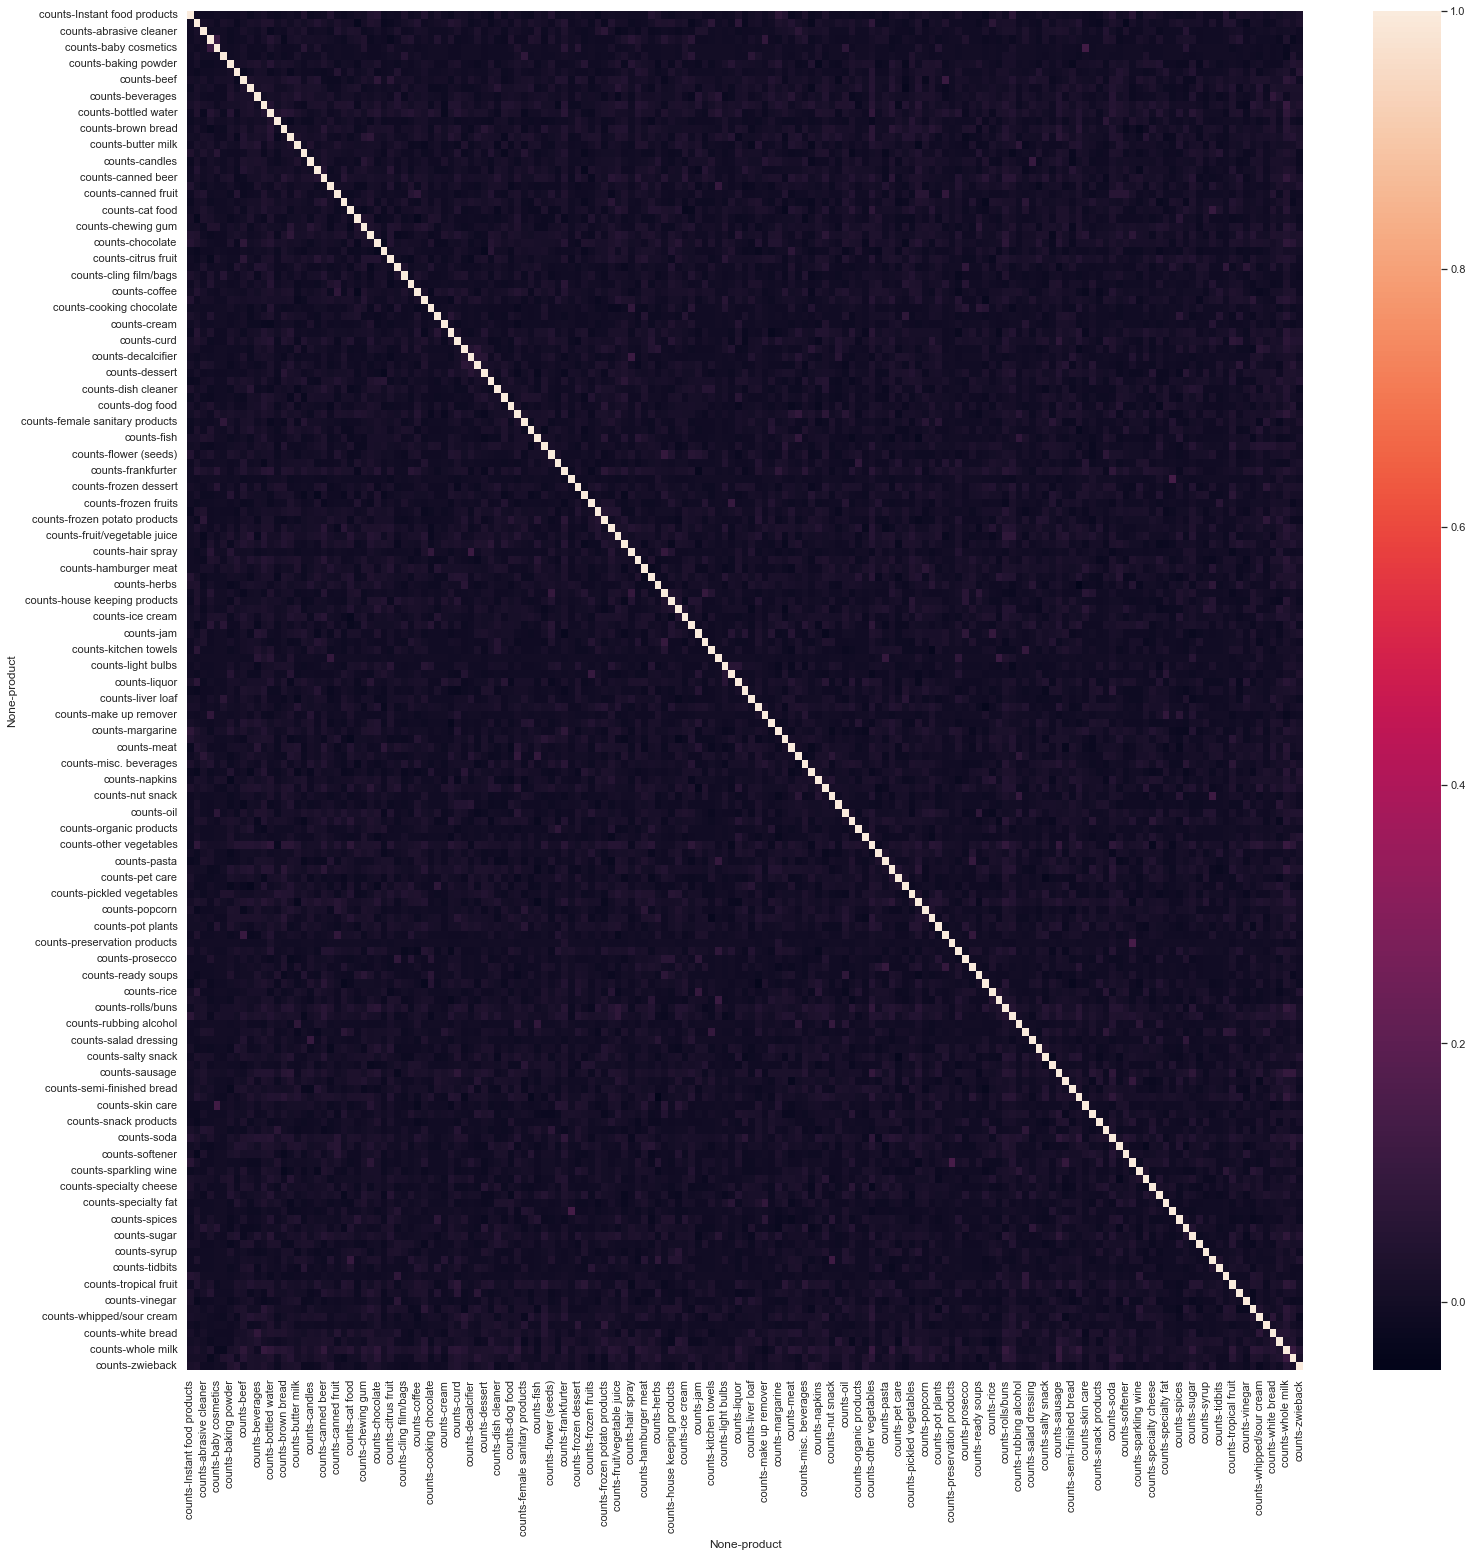

In [59]:
plt.figure(figsize=(25,25))
sns.heatmap(corr)

Какие продукты сильнее всего коррелируют с яйцами, `domestic eggs` (их чаще всего покупают вместе)? Какие продукты "мешают" купить яйца, то есть отрицательно коррелируют с их покупкой? 

In [60]:
eggs_larg_corr = list(corr['counts']['domestic eggs']['counts'].sort_values(ascending=False).index[1:5])
eggs_neg_corr = list(corr['counts']['domestic eggs']['counts'][corr['counts']['domestic eggs']['counts'].sort_values(ascending=False) < 0].index)

print(f"Следущие продукты сильнее всего коррелируют с яйцами: {', '.join(eggs_larg_corr)}")
print(f" ")
print(f"Следущие продукты отрицательно коррелируют с яйцами: {', '.join(eggs_neg_corr)}")

Следущие продукты сильнее всего коррелируют с яйцами: meat spreads, whole milk, newspapers, rubbing alcohol
 
Следущие продукты отрицательно коррелируют с яйцами: artif. sweetener, brandy, cake bar, candles, canned fish, cocoa drinks, cooking chocolate, cream, dental care, dessert, flower soil/fertilizer, frozen chicken, frozen fruits, hair spray, hamburger meat, herbs, jam, ketchup, kitchen utensil, liqueur, male cosmetics, nut snack, organic products, pet care, popcorn, potato products, preservation products, prosecco, pudding powder, ready soups, salad dressing, sauces, snack products, soft cheese, specialty cheese, specialty vegetables, spices, sweet spreads, tidbits, turkey


Какие два продукта коррелируют сильнее всего? 

In [61]:
g = np.array(corr)
np.fill_diagonal(g, val=0, wrap=True)
index_max = np.where(corr == g.max())
col1_num = index_max[0][1]
col2_num = index_max[1][1]
print(f'Сильнее всего коррелируют {corr.columns[col1_num][1]} и {corr.columns[col2_num][1]}.')

Сильнее всего коррелируют soups и preservation products.


__Вопрос:__ почему корреляция пирсона это плохой способ измерить взаимосвязть между покупками?

__Ответ:__ эта корреляция подразумевает предположение наличия линейной зависимости и причинно-следственной связи, однако на деле может быть не так. Также на нее сильное влияние могут оказывать крайние значения.


## 2.2 Коэффициент корреляции Мэтьюса

__Коэффициент корреляции Мэтьюса__ — это мера силы взаимосвязи между двумя бинарными переменными. Для того чтобы его вычислить, необходимо использовать таблицу сопряженности

|        |  $0$   |  $1$   |
|:------:|:------:|:------:|
| $0$    |  $a$   |  $b$   |
| $1$    |  $c$   |  $d$   |

В строках таблицы сопряжённости находятся значения одного признака, по столбцам — второго, в каждой ячейке — количество объектов, на которых реализовалась эта пара. Коэффициент корреляции Мэтьюса вычисляется по данным из таблицы сопряжённости следующим образом:

$$
MCC(X_1, X_2) = \frac{a \cdot d - b \cdot c}{\sqrt{(a + b) \cdot (a + c) \cdot (b + d) \cdot (c + d)}}
$$

Точно так же, как и коэффициенты Пирсона и Спирмена, корреляция Мэтьюса лежит в диапазоне от $−1$ до $1.$ Нулевое значение соответсвуте отсутствию взаимосвязи между переменными. Значение $MCC(X_1, X_2) = 1$ соотвествует случаю, когда $X_1$ и $X_2$ полностью совпадают, то есть $b = c = 0$. Значение  $MCC(X_1, X_2) = -1$ соответствует случаю, когда каждое значение $X_1$ отличается от каждого значения $X_2$. 

Для категориальных переменных можно также считать коэффициент V-Крамера. Подробнее можно почитать про разные корреляции [в этом конспекте.](https://disk.yandex.ru/i/Znahvyg3mIrW9A)

__в) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары коэффициент корреляции Мэтьюса. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, matthews_corrcoef`. 
5. Отсортируйте получившиеся пары по коэффициенту Мэтьюса от 1 к -1 и сохраните первые сто строк получившейся таблички в файл `result_matthews.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [62]:
#1
joint_prod2 = joint_prod.replace(np.arange(2, joint_prod.max().max()+1), 1)
#1.1 упростим полученную таблицу
joint_prod2 = joint_prod2.rename(columns={"counts":""})
joint_prod2.columns = [t[0] if t[0] else t[1] for t in joint_prod2.columns]

In [63]:
#2
to_del_cols = joint_prod2.columns[np.where(joint_prod2.sum(axis=0) < 10)[0].tolist()]
joint_prod2 = joint_prod2.drop(columns=to_del_cols)

In [64]:
#3
from sklearn.metrics import matthews_corrcoef
from itertools import combinations

product_1 = []
product_2 = []
m_corrcoef =[]
for i in list(combinations(joint_prod2, 2)):
    p_1 = i[0]
    p_2 = i[1]
    mat_corr = matthews_corrcoef(list(joint_prod2[p_1]), list(joint_prod2[p_2]))
    product_1.append(p_1)
    product_2.append(p_2)
    m_corrcoef.append(mat_corr)

In [65]:
#4
mat_corr = pd.DataFrame()
mat_corr['product_1'] = product_1
mat_corr['product_2'] = product_2
mat_corr['matthews_corrcoef'] = m_corrcoef

In [66]:
#5
mat_corr = mat_corr.sort_values(by='matthews_corrcoef', ascending=False)
mat_corr[:100].to_csv('result_matthews.csv', index = False)

Отправьте свой файл `result_mat.csv` в контест (https://contest.yandex.ru/contest/47242/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__likhalifaeva@edu.hse.ru
Посылка: 85109195__

## 2.3 Независимость событий

 Конечно же, корреляция — это [не единственный способ искать](https://habr.com/ru/company/ods/blog/353502/) между покупками ассоциативные правила. Давайе попробуем другой подход.

Мы знаем, что события $A$ и $B$ называются независимыми, если $P(AB) = P(A)\cdot P(B)$. Отталкиваясь от этого определения, можно ввести другую характеристику, которая показывает, насколько продукты зависят друг от друга, а именно __поддержку (lift).__ 

$$
lift = \frac{P(AB)}{P(A)\cdot P(B)}
$$

Эта метрика описывает отношение зависимости товаров к их независимости. Если оказалось, что `lift = 1`, это означает, что покупка товара $A$ не зависит от покупки товара $B$. Если `lift > 1`, то это означает, что вероятность встретить оба товара в чеке, $P(AB)$ высокая, то есть товары покупают вместе. Если `lift < 1`, это означает, что товары, наоборот, очень часто покупают по-отдельности. 

__г) [5 баллов]__ Посчитайте значение нашей метрики для яиц и молока (`'whole milk', 'domestic eggs'`).

> Вам аккуратно нужно сделать три среза по условию  `>= 1`. Там, где пара надо делать срез так, чтобы оба товара дали `True`. Сделать это в одну строку вам поможет метод `.all(axis=1)`. Частоты можно получить методом `.mean()`, так как python думает, что `False` - это ноль, а `True` - это единица.

In [67]:
# упростим таблицу
joint_prod3 = joint_prod.rename(columns={"counts":""})
joint_prod3.columns = [t[0] if t[0] else t[1] for t in joint_prod3.columns]

In [68]:
prob_a_1 = (joint_prod3['whole milk'] >= 1).mean()
prob_b_1 = (joint_prod3['domestic eggs'] >= 1).mean()
prob_ab_1 = (joint_prod3[['whole milk', 'domestic eggs']] >=1).all(axis=1).mean()
lift_1 = prob_ab_1 / (prob_a_1 * prob_b_1)
lift_1

1.152241691425711

__д) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары значение поддержки, `lift`. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, lift`. 
5. Отсортируйте получившиеся пары по значению lift от больших к меньшим и сохраните первые сто строк получившейся таблички в файл `result_lift.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [69]:
#1
joint_prod3 = joint_prod3.replace(np.arange(2, joint_prod.max().max()+1), 1)
#2
to_del_cols = joint_prod3.columns[np.where(joint_prod3.sum(axis=0) < 10)[0].tolist()]
joint_prod3 = joint_prod3.drop(columns=to_del_cols)

In [70]:
#3
product_1 = []
product_2 = []
lift =[]
for i in list(combinations(joint_prod2, 2)):
    p_1 = i[0]
    p_2 = i[1]
    prob_1 = (joint_prod3[p_1] >= 1).mean()
    prob_2 = (joint_prod3[p_2] >= 1).mean()
    prob_1_2 = (joint_prod3[[p_1, p_2]] >= 1).all(axis=1).mean()
    lift_ = prob_1_2 / (prob_1 * prob_2)
    product_1.append(p_1)
    product_2.append(p_2)
    lift.append(lift_)

In [71]:
#4
lift_tab = pd.DataFrame()
lift_tab['product_1'] = product_1
lift_tab['product_2'] = product_2
lift_tab['lift'] = lift

In [72]:
#5
lift_tab = lift_tab.sort_values(by='lift', ascending=False)
lift_tab[:100].to_csv('result_lift.csv', index = False)

Отправьте свой файл `result_lift.csv` в контест (https://contest.yandex.ru/contest/47242/problems/C/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__likhalifaeva@edu.hse.ru
Посылка: 85109153__

__е) [5 баллов]__ Давайте проинтепретируем результаты.

- Посмотрите на 10 пар продуктов с самой высокой корреляцией Мэтьюса и на 10 пар с самой низкой. Проинтерпретируйте, насколько эта корреляция логична? Придумайте ситуации, когда какие-то из пар могли бы покупаться вместе.
- Посмотрите на 10 пар продкутов с самым высоким lift, насколько логично они выделились? 
- Насколько большим оказалось пересечение двух методов? Как думаете, почему? А если взять первые сто пар?


### Корреляция Мэтьюса:

In [73]:
print(f"10 пар продуктов с самой высокой корреляцией Мэтьюса:")
mat_corr[['product_1', 'product_2']][:10]

10 пар продуктов с самой высокой корреляцией Мэтьюса:


,product_1,product_2
9689,nut snack,tea
6542,flower (seeds),honey
11218,sausage,yogurt
7958,honey,ketchup
11778,whole milk,yogurt
8582,kitchen towels,rum
8417,jam,rice
2954,canned fruit,potato products
3254,cat food,tea
6354,fish,meat spreads


In [74]:
print(f"10 пар продуктов с самой низкой корреляцией Мэтьюса:")
mat_corr[['product_1', 'product_2']][-10:]

10 пар продуктов с самой низкой корреляцией Мэтьюса:


,product_1,product_2
10431,pip fruit,soups
8725,liquor,pip fruit
10845,red/blush wine,semi-finished bread
8138,hygiene articles,mayonnaise
9227,meat,mustard
10259,pet care,salty snack
8570,kitchen towels,pork
1141,berries,photo/film
8962,long life bakery product,red/blush wine
7921,herbs,shopping bags


__Вывод:__ В целом, эта корреляция логична. Пары продуктов с наибольшими значениями коэффициента могут покупаться вместе в качестве дополения друг к другу. Например, ореховые снэки могут покупаться к чаю, а молоко может покупаться вместе с йогуртом, поскольку эти товары находятся в одном отделе и пользуются популярностью у покупателей.

### Lift:

In [75]:
print(f"10 пар продкутов с самым высоким lift:")
lift_tab[['product_1', 'product_2']][:10]

10 пар продкутов с самым высоким lift:


,product_1,product_2
6669,flower soil/fertilizer,organic products
7995,honey,ready soups
9689,nut snack,tea
7958,honey,ketchup
4715,cooking chocolate,ready soups
2954,canned fruit,potato products
7114,frozen fruits,tidbits
7993,honey,prosecco
8009,honey,skin care
4713,cooking chocolate,prosecco


__Вывод:__ Если смотреть на этот способ, то пары с наибольшей связью выделяются менее логично, в большинстве случаев сложнее представить ситуации, в которых эти товары будут покупаться вместе.

### Пересечение методов

In [76]:
print(f"Величина пересечения для 10 первых пар: {len(set(mat_corr[['product_1', 'product_2']][:10].index) & set(lift_tab[['product_1', 'product_2']][:10].index))} чека")

Величина пересечения для 10 первых пар: 3 чека


In [77]:
print(f"Величина пересечения для 100 первых пар: {len(set(mat_corr[['product_1', 'product_2']][:100].index) & set(lift_tab[['product_1', 'product_2']][:100].index))} чека")

Величина пересечения для 100 первых пар: 34 чека


__Вывод:__ На пересечение этих методов приходится около трети чеков в обоих случаях(10 и 100 пар). Поскольку один из способов менее эффективный, он выделяет сильные и значимые связи, но при этом, также выделяет и менее логичные.

__ё) [бонусные 5 баллов]__ 

Иногда в чеках пытаются искать __продукты-якоря.__ То есть продукты, которые являются основными. Например: айфон - основной продукт, наушники и чехол - дополнения к нему. Предложите алгоритм поиска таких товаров, похожий на то, что мы делали выше. Реализуйте алгоритм поиска якорей, который вы придумали. 

__Ответ:__ ваш текст


In [78]:
# your code here
# [̲̅$̲̅(̲̅5̲̅)̲̅$̲̅]